In [ ]:
!apt install python3-rtree --quiet
!pip install osmnx
!pip install geopandas
!pip install matplotlib
!pip install python-math

!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y graphviz && pip install pydot

!pip install --upgrade scipy networkx

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 5.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 124105 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.3 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

Duri

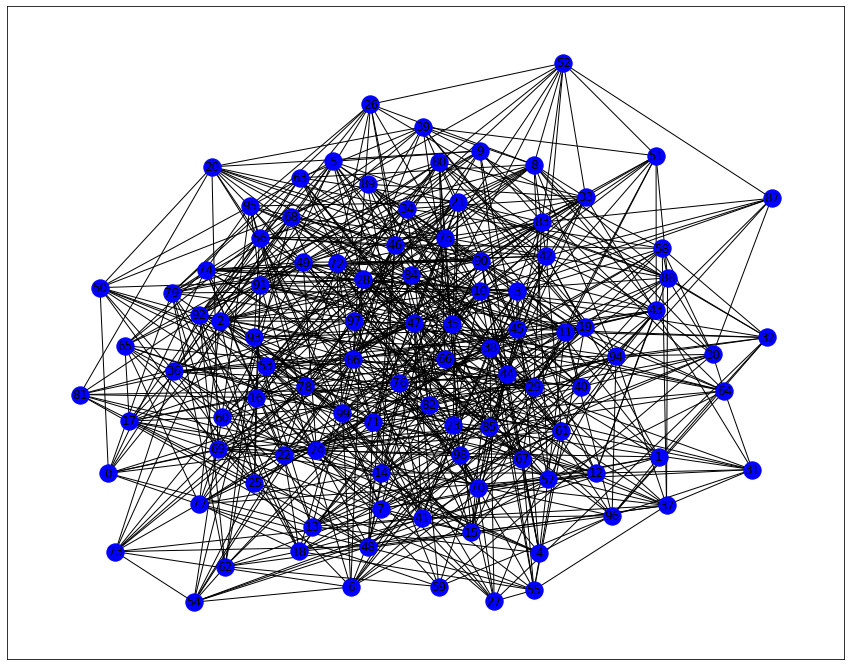

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
from networkx.utils import arbitrary_element
import math
import numpy as np
import pydot
import random

G= nx.erdos_renyi_graph(100,0.15)
plt.figure(figsize=(15,12)) 
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color="blue")
plt.show()

In [ ]:
N = []
D = []
NB = []
for v in nx.nodes(G):
  N.append(v)
  D.append(nx.degree(G, v))
  nb = [n for n in G.neighbors(v)]
  NB.append(nb)
data_tuples = list(zip(N,D,NB))

df = pd.DataFrame(data_tuples, columns=['Node','Degree', 'Neighbors']).sort_values('Degree', ascending=[False]).reset_index()
del df['index']
avgd = int(df['Degree'].mean())  #Average degree
alpha = min(df['Degree'])   #min degree
print(df,"\n\n", 'Avg degree is: ', avgd, "\n", 'Min degree is(alpha): ', alpha)

    Node  Degree                                          Neighbors
0     10      24  [2, 11, 18, 20, 23, 24, 26, 32, 35, 43, 49, 51...
1     86      23  [18, 26, 27, 28, 29, 33, 34, 40, 43, 45, 51, 5...
2     99      21  [6, 7, 12, 13, 27, 35, 41, 46, 56, 65, 67, 72,...
3     82      21  [0, 7, 13, 15, 23, 31, 34, 42, 44, 47, 50, 57,...
4     47      21  [2, 5, 16, 23, 26, 28, 41, 44, 48, 56, 58, 59,...
..   ...     ...                                                ...
95    27      10           [16, 23, 32, 38, 53, 55, 61, 70, 86, 99]
96    81      10           [13, 16, 20, 22, 24, 25, 29, 47, 92, 97]
97     1      10            [7, 21, 28, 32, 40, 42, 48, 69, 70, 96]
98    87       8                   [10, 30, 40, 42, 47, 52, 61, 83]
99    59       8                    [0, 30, 42, 47, 62, 71, 92, 96]

[100 rows x 3 columns] 

 Avg degree is:  14 
 Min degree is(alpha):  8


In [ ]:
import io
express = []
for x in range(len(df)):
  lhs = str(df['Node'][x])

  rhs = []
  for i in df['Neighbors'][x]:
    ind = "x(" + str(i) + ")"
    rhs.append(ind)
  #rhs = str(rhs)
  
  rhs = ' + '.join(str(e) for e in rhs) 
  final = "x(" + lhs + ")" + " >= " + "(k - " + "(" + rhs + "))/k"
  express.append(final)

with open("180empty.docx", "w") as f:
  for line in express:
    f.write(line)
    f.write('\n')

In [ ]:
def dominating_set(G,k): #randomized k-dominated algorithm
  all_nodes = set(G)
  A = []

#calculating probability
  def nCr(n, r):       #nCr
    return (fact(n) / (fact(r) * fact(n - r)))
  def fact(n):
    if n == 0:
      return 1
    res = 1
    for i in range(2, n+1):
      res = res * i     
    return res

  alphadash = avgd - k + 1
  r1 = nCr(avgd, k-1)
  root = np.power(r1*(1 + alphadash),(1/alphadash))
  p = 1 - (1/root)
##################################################################################

  for i in df['Node']: # A set
    rn = (random.randint(0,100)/100)
    if rn < p:
      A.append(i)
  #print("First list", A, len(A))
  rem_nodes = all_nodes - set(A) # remaining nodes


#Another set B via algorithm
  N2=[]
  D2=[]
  for v in rem_nodes:
    N2.append(v)
    D2.append(nx.degree(G, v))
  data_tuples2 = list(zip(N2,D2))

  df2 = pd.DataFrame(data_tuples2, columns=['Node','Degree']).sort_values('Degree', ascending=[False]).reset_index()
  del df2['index']

  for i in df2['Node']:                     #checking from rem_nodes
    counter = 0
    nb = [n for n in G.neighbors(i)]        #list of neighbors

    for j in nb:                             #checking each element in neighbours list with setA
      if j in A:
        counter+=1

    if counter < k:
      A.append(i)
  return A

# a = dominating_set(G,2)
# print(a)
# print(len(a))

In [ ]:
def is_dominating_set(G, nbunch): # function to check whether dominating set
    testset = {n for n in nbunch if n in G}
    nbrs = set(chain.from_iterable(G[n] for n in testset))
    if len(set(G) - testset - nbrs) == 0:
      return 1
    else:
      return 0

#is_dominating_set(G, a)

In [ ]:
# pos = nx.spring_layout(G)
# plt.figure(figsize=(20,15))
# # draw graph
# nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')

# # draw subgraph for highlights
# nx.draw_networkx(G.subgraph(a), pos=pos, font_size=16, node_color='red', font_color='green')

In [ ]:
def minimal(G , D): #minimal K dominating set
  N=[]
  L = []
  for d in D:
    nb = [n for n in G.neighbors(d)]
    abc = set(nb) - set(D)
    N.append(d)
    L.append(len(abc))

  data_tuples = list(zip(N,L))

  df_min = pd.DataFrame(data_tuples, columns=['Node','N[v]-D']).sort_values('N[v]-D', ascending=[False]).reset_index()
  del df_min['index']
  #print(df_min)
  nodes = list(df_min['Node'])

  for i in nodes:
    mds = set(D) - set([i])
    y = is_dominating_set(G, mds)

    if y == 1:
     # print('del')
      D = set(D) - set([i])
    # else:
    #   print('not del')
  return D

# MD = minimal(G,a)
# print(MD, len(MD))
# z = is_dominating_set(G, MD) # to check if the final set is dominating
# print(z)



In [ ]:
def greedytry(G,k):
  D=[]
  tbd=[]
  rem_nodes = list(df['Node'])
  for rn in rem_nodes:
    c=0
    nn = [n for n in G.neighbors(rn)]
    nn=set(nn) - set(tbd)

    for j in nn:
      if (j in nn) and (j in D): 
        c+=1
    if c<k:
      D.append(rn)
      tbd = list(set(nn) | set([rn]))
      rem_nodes = set(rem_nodes) - set(tbd)
  return D

# gr = greedytry(G,2)
# print(gr)
# print(len(gr))
# z = is_dominating_set(G, gr)
# print(z)

In [ ]:
a1 = dominating_set(G,1)
print("randomized G,1 is ",len(a1))
is_dominating_set(G, a1)
m1 = minimal(G , a1)
print("min randomized G,1 is ", len(m1))
is_dominating_set(G,m1)

g1 = greedytry(G,1)
print("greedy G,1 is ", len(g1))
is_dominating_set(G, g1)
gm1 = minimal(G , g1)
print("min greedy G,1 is ", len(gm1))
is_dominating_set(G, gm1)

randomized G,1 is  19
min randomized G,1 is  16
greedy G,1 is  15
min greedy G,1 is  13


1

In [ ]:
a2 = dominating_set(G,2)
print("randomized G,2 is ",len(a2))
is_dominating_set(G, a2)
m2 = minimal(G , a2)
print("min randomized G,2 is ", len(m2))
is_dominating_set(G,m2)

g2 = greedytry(G,2)
print("greedy G,2 is ", len(g2))
is_dominating_set(G, g2)
gm2 = minimal(G , g2)
print("min greedy G,2 is ", len(gm2))
is_dominating_set(G, gm2)

randomized G,2 is  34
min randomized G,2 is  15
greedy G,2 is  22
min greedy G,2 is  14


1

In [ ]:
a3 = dominating_set(G,3)
print("randomized G,3 is ",len(a3))
is_dominating_set(G, a2)
m3 = minimal(G , a3)
print("min randomized G,3 is ", len(m3))
is_dominating_set(G,m3)

g3 = greedytry(G,3)
print("greedy G,3 is ", len(g3))
is_dominating_set(G, g3)
gm3 = minimal(G , g3)
print("min greedy G,3 is ", len(gm3))
is_dominating_set(G, gm3)

randomized G,3 is  48
min randomized G,3 is  15
greedy G,3 is  33
min greedy G,3 is  13


1

In [ ]:
a4 = dominating_set(G,4)
print("randomized G,4 is ",len(a4))
is_dominating_set(G, a4)
m4 = minimal(G , a4)
print("min randomized G,4 is ", len(m4))
is_dominating_set(G,m4)

g4 = greedytry(G,4)
print("greedy G,4 is ", len(g4))
is_dominating_set(G, g4)
gm4 = minimal(G , g4)
print("min greedy G,4 is ", len(gm4))
is_dominating_set(G, gm4)

randomized G,4 is  50
min randomized G,4 is  17
greedy G,4 is  36
min greedy G,4 is  13


1

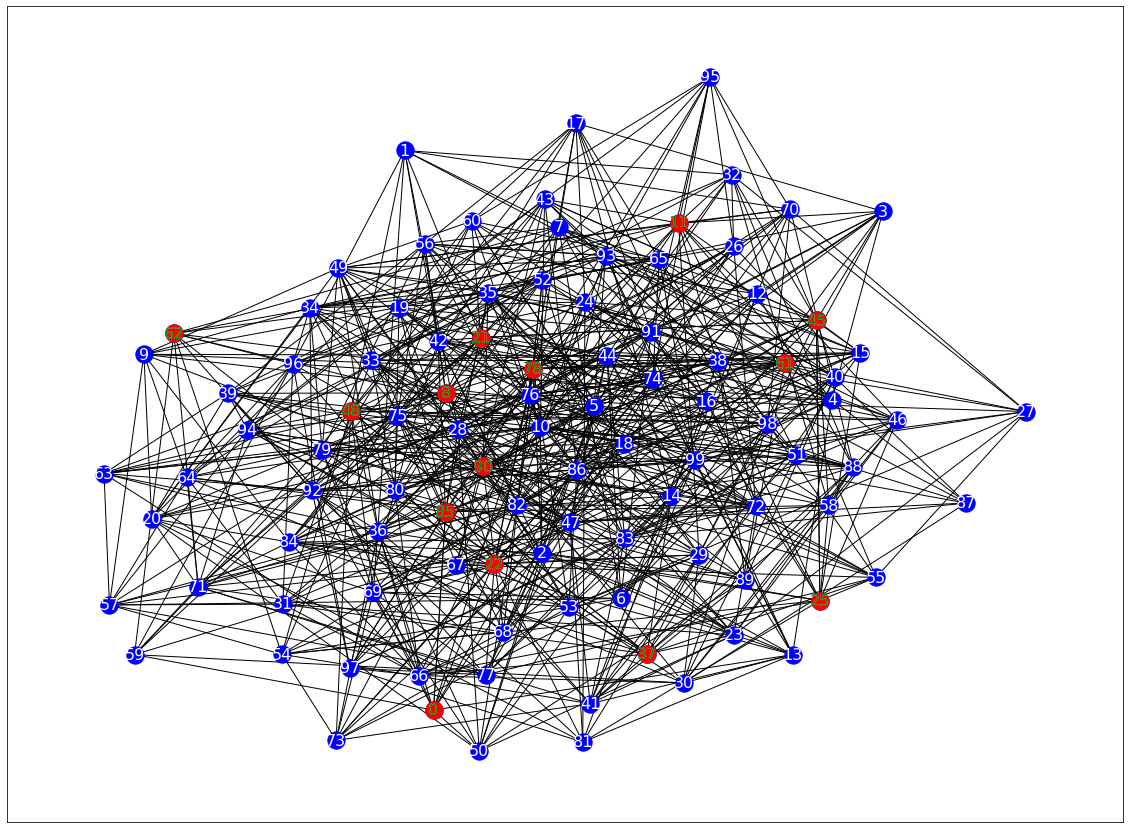

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(20,15))
# draw graph
nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')

# draw subgraph for highlights
nx.draw_networkx(G.subgraph(gm2), pos=pos, font_size=16, node_color='red', font_color='green')

In [ ]:
print(m1)
print("..............")
print(gm1)

{0, 65, 3, 66, 67, 75, 78, 81, 86, 93, 32, 39, 42, 48, 50, 57}
..............
{99, 3, 8, 10, 78, 47, 50, 85, 86, 21, 25, 62, 31}


In [ ]:
print(m2)
print("..............")
print(gm2)

{0, 1, 66, 71, 9, 13, 77, 17, 83, 27, 91, 29, 94, 41, 44}
..............
{0, 37, 8, 11, 45, 78, 48, 21, 22, 85, 25, 90, 61, 62}
